<a href="https://colab.research.google.com/github/CaioNorce/Data-Science/blob/main/EDA_gorjeta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTANDO A BASE DE DADOS

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('tips.csv')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


#TRADUÇÃO

In [ ]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [ ]:
renomear = {
    'total_bill' : 'valor_da_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia_da_semana',
    'time' : 'hora_do_dia',
    'size' : 'total_de_pessoas'
}

In [ ]:
gorjetas = dados.rename(columns = renomear)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [ ]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

In [ ]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [ ]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [ ]:
dias = {
    'Sun' : 'Domingo',
    'Sat' : 'Sábado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
}

In [ ]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [ ]:
gorjetas.sample(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
197,43.11,5.00,Sim,Quinta,Lunch,4
170,50.81,10.00,Sim,Sábado,Dinner,3
76,17.92,3.08,Sim,Sábado,Dinner,2
194,16.58,4.00,Sim,Quinta,Lunch,2
132,11.17,1.50,Não,Quinta,Lunch,2


In [ ]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [ ]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [ ]:
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [ ]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [ ]:
gorjetas.sample(15)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
171,15.81,3.16,Sim,Sábado,Jantar,2
156,48.17,5.00,Não,Domingo,Jantar,6
70,12.02,1.97,Não,Sábado,Jantar,2
115,17.31,3.50,Não,Domingo,Jantar,2
154,19.77,2.00,Não,Domingo,Jantar,4
196,10.34,2.00,Sim,Quinta,Almoço,2
78,22.76,3.00,Não,Quinta,Almoço,2
27,12.69,2.00,Não,Sábado,Jantar,2
166,20.76,2.24,Não,Domingo,Jantar,2
149,7.51,2.00,Não,Quinta,Almoço,2


In [ ]:
gorjetas.shape

(244, 6)

#IMPORTANDO SEABORN

In [ ]:
!pip install seaborn==0.9.0

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#ANÁLISE 1 - VALOR DA CONTA E GORJETA

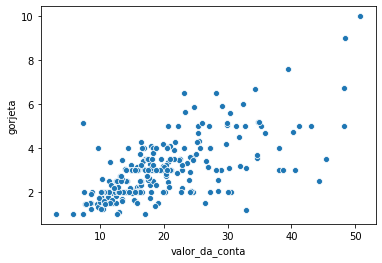

In [ ]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [ ]:
print('A base de dados contém {} registros\n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

##Criando o campo porcentagem##

In [ ]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta'] * 100.0

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.944673
1,10.34,1.66,Não,Domingo,Jantar,3,16.054159
2,21.01,3.50,Não,Domingo,Jantar,3,16.658734
3,23.68,3.31,Não,Domingo,Jantar,2,13.978041
4,24.59,3.61,Não,Domingo,Jantar,4,14.680765


In [ ]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68


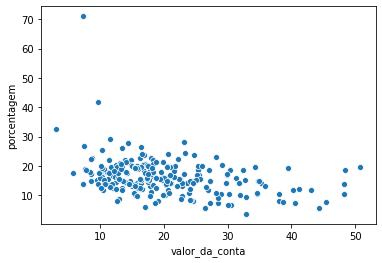

In [ ]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

**Aparentemente, os valores não são proporcionais**

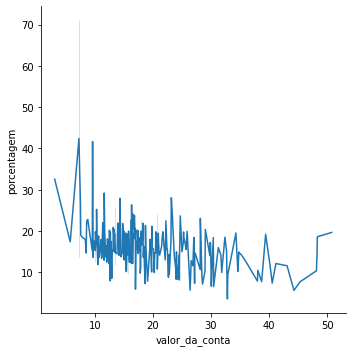

In [ ]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

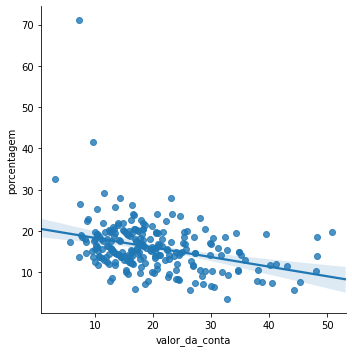

In [ ]:
regressao = sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

#ANÁLISE 2 - SOBREMESA

In [ ]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,16.319140
std,9.832154,1.401468,0.810751,8.511748
min,3.070000,1.000000,1.000000,3.560000
25%,13.420000,2.000000,2.000000,10.680000
50%,17.920000,3.000000,2.000000,15.380000
75%,26.860000,3.680000,3.000000,19.510000
max,50.810000,10.000000,5.000000,71.030000


In [ ]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,15.932318
std,8.255582,1.377190,1.017984,3.990701
min,7.250000,1.000000,1.000000,5.680000
25%,13.325000,2.000000,2.000000,13.690000
50%,17.590000,2.740000,2.000000,15.560000
75%,22.755000,3.505000,3.000000,18.500000
max,48.330000,9.000000,6.000000,29.200000


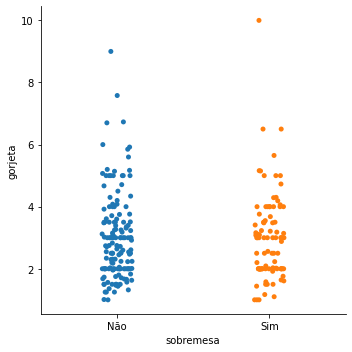

In [ ]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

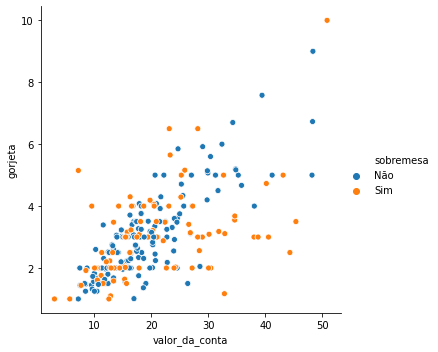

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

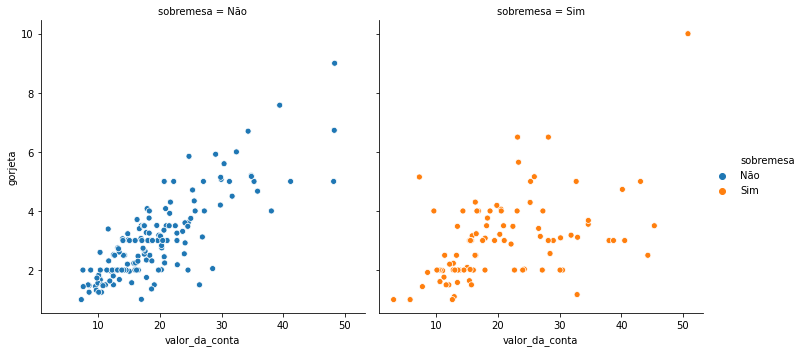

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

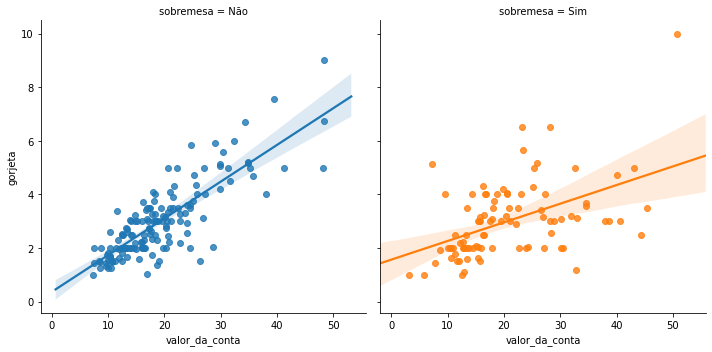

In [ ]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

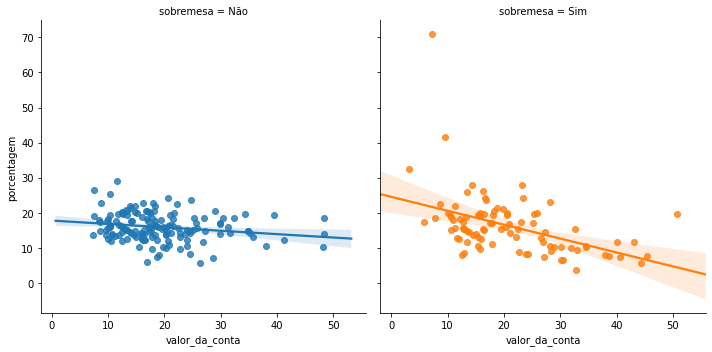

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

**Visualmente, existe uma diferença sutil na gorjeta dependendo se a sobremesa é pedida ou não.**

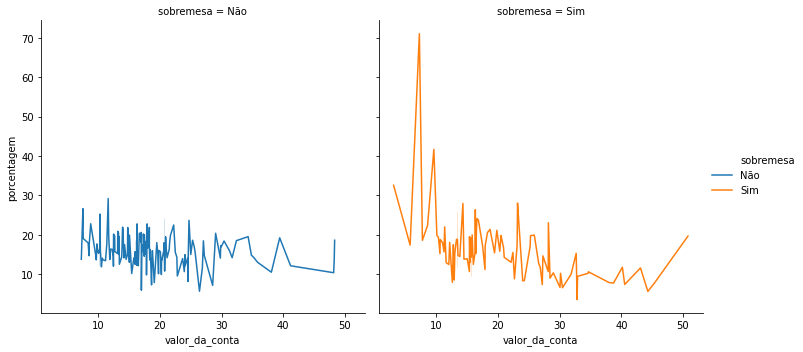

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

##TESTE DE HIPÓTESE

**H<sup>null</sup>**
**A distribuição da taxa da gorjeta é a mesma nos dois grupos.**

**H<sup>alt</sup>**
**A distribuição da taxa da gorjeta não é a mesma nos dois grupos.**

In [ ]:
from scipy.stats import ranksums

In [ ]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem
sobremesa

56      7.89
58     15.66
60     15.82
61     14.48
62     17.97
       ...  
234    19.32
236     7.94
237     3.56
240     7.36
241     8.82
Name: porcentagem, Length: 93, dtype: float64

In [ ]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem
sem_sobremesa

0       5.94
1      16.05
2      16.66
3      13.98
4      14.68
       ...  
235    12.41
238    13.03
239    20.39
242     9.82
243    15.97
Name: porcentagem, Length: 151, dtype: float64

In [ ]:
r = ranksums(sobremesa, sem_sobremesa)

In [ ]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.558850059321255


**H<sup>null</sup>**
**A distribuição da taxa da gorjeta é a mesma nos dois grupos.**

#ANÁLISE 3 - DIA DA SEMANA

In [ ]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

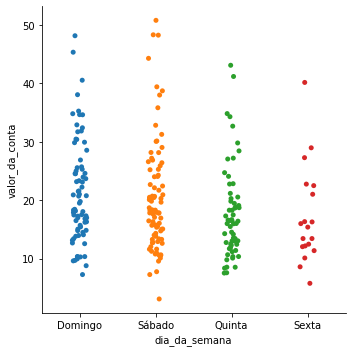

In [ ]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

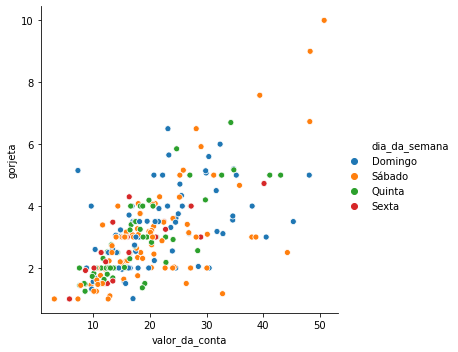

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

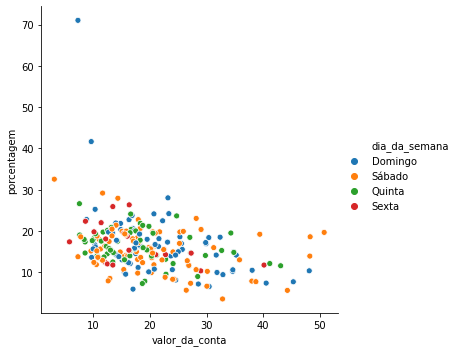

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

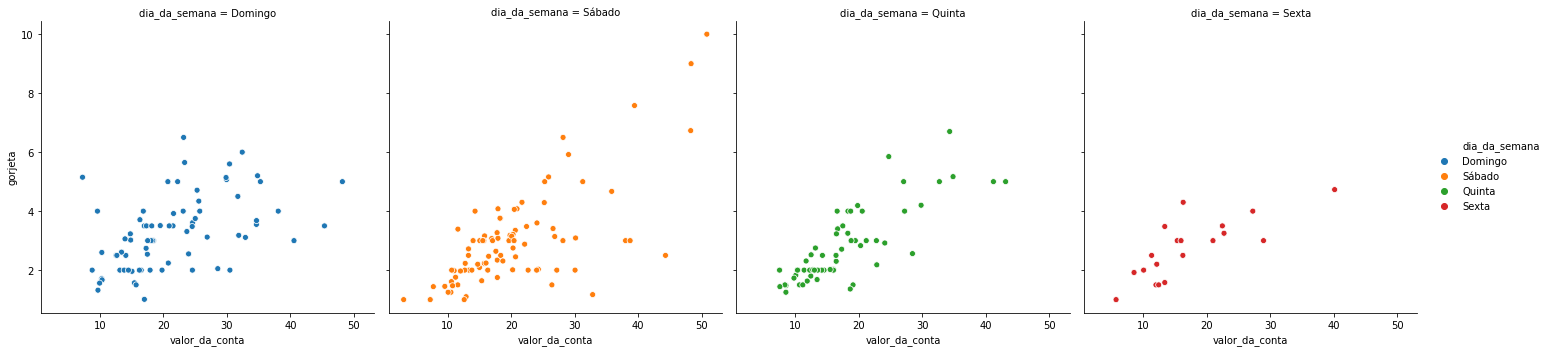

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

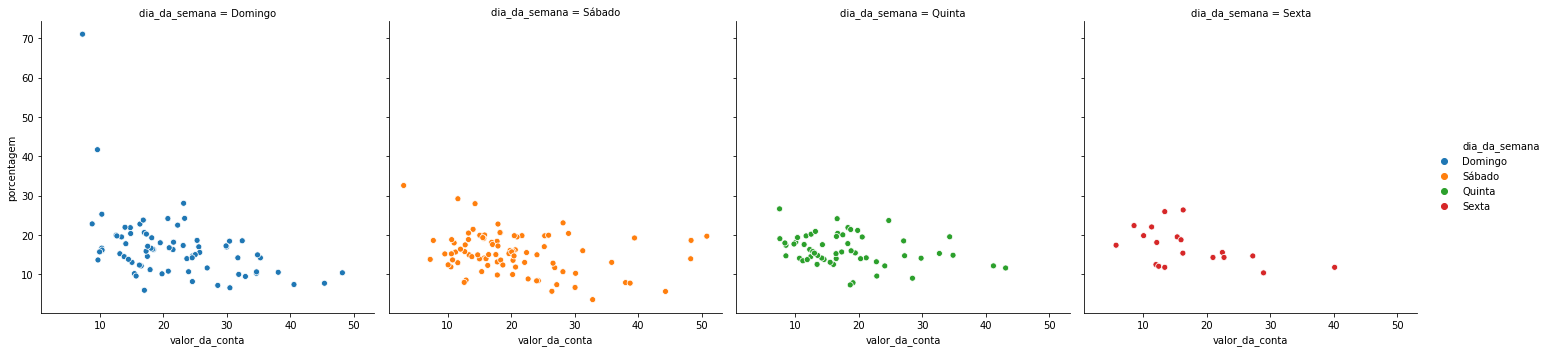

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

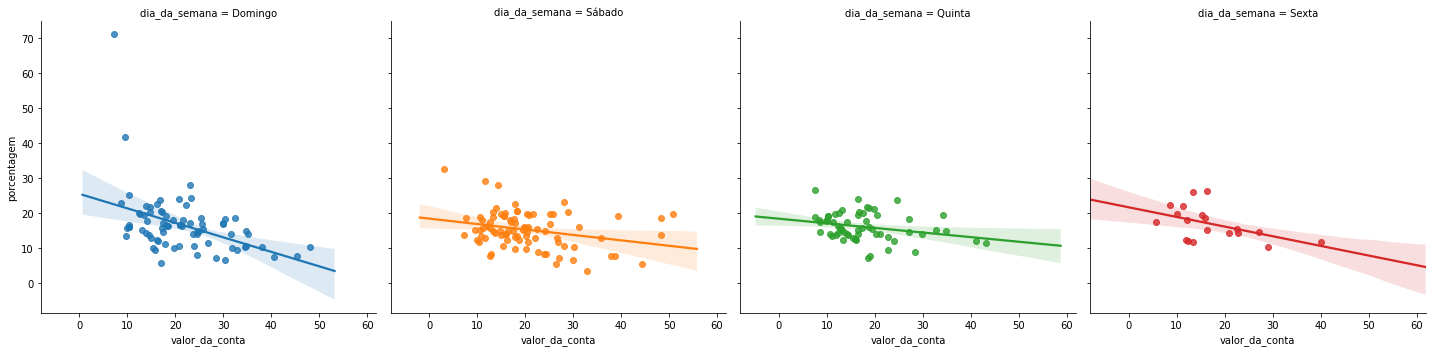

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [ ]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [ ]:
print('A média geral das gorjetas é de %.3f%%' %(media_geral_gorjetas))

A média geral das gorjetas é de 2.998%


In [ ]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,16.689605
Quinta,17.682742,2.771452,16.126452
Sexta,17.151579,2.734737,16.991579
Sábado,20.441379,2.993103,15.314598


In [ ]:
print('Frequência dos dias\n')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias



Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

##TESTE DE HIPÓTESE

**H<sup>null</sup>**
**A distribuição das gorjetas é igual no sábado e no domingo**

**H<sup>alt</sup>**
**A distribuição de gorjetas não é igual no sábado e no domingo**

In [ ]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta
valor_conta_domingo

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
186    20.90
187    30.46
188    18.15
189    23.10
190    15.69
Name: valor_da_conta, Length: 76, dtype: float64

In [ ]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta
valor_conta_sabado

19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
       ...  
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
Name: valor_da_conta, Length: 87, dtype: float64

In [ ]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)

In [ ]:
print('O resultado do p-value é de %.2f' %(r2.pvalue))

O resultado do p-value é de 0.36


#ANÁLISE 4 - HORA DO DIA

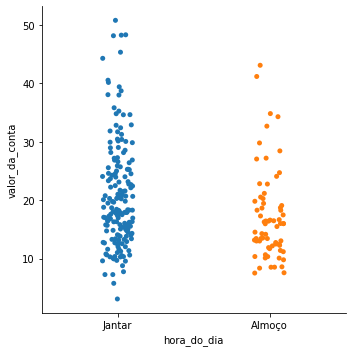

In [ ]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

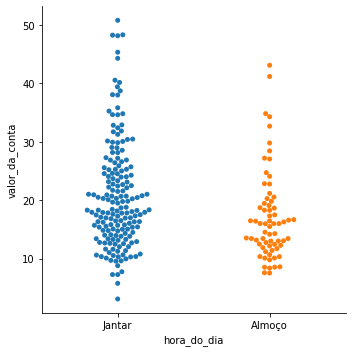

In [ ]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

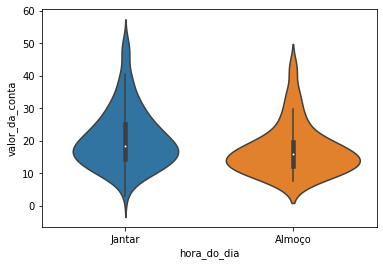

In [ ]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

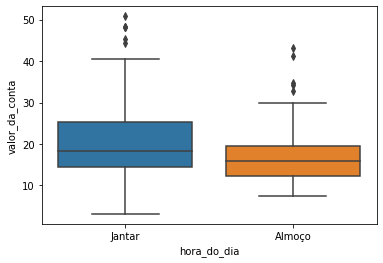

In [ ]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [ ]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

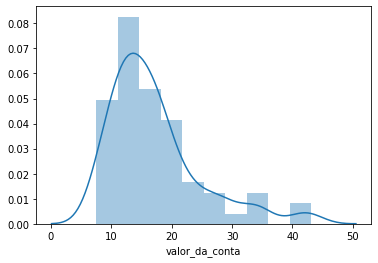

In [ ]:
sns.distplot(almoco)

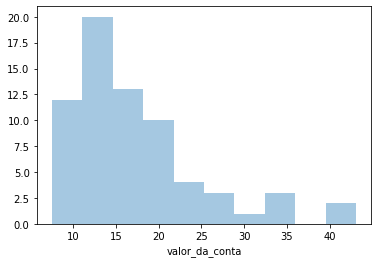

In [ ]:
sns.distplot(almoco, kde=False)

In [ ]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

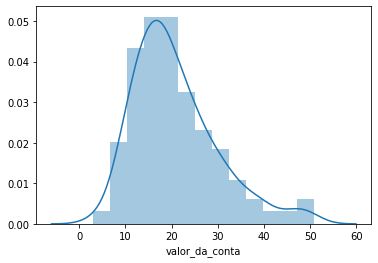

In [ ]:
sns.distplot(jantar)

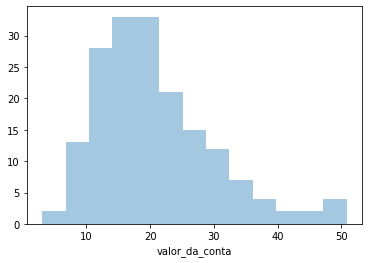

In [ ]:
sns.distplot(jantar, kde=False)

In [ ]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,16.411765
Jantar,20.797159,3.102670,15.951477


##TESTE DE HIPÓTESE

**H<sup>null</sup>**
**A distribuição do valor da conta é igual no almoço e no jantar**

**H<sup>alt</sup>**
**A distribuição do valor da conta não é igual no almoço e no jantar**

In [ ]:
r3 = ranksums(jantar, almoco)
r3

RanksumsResult(statistic=3.2438872807262955, pvalue=0.0011791039723641672)

In [ ]:
print('O valor do p-value é de %.3f' %(r3.pvalue))

O valor do p-value é de 0.001


**H<sup>alt</sup>**
**A distribuição do valor da conta não é igual no almoço e no jantar**

In [ ]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem
porcentagem_almoco

77     14.71
78     13.18
79     15.67
80     15.43
81     20.41
       ...  
222    22.38
223    18.77
224    11.77
225    15.37
226    19.82
Name: porcentagem, Length: 68, dtype: float64

In [ ]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem
porcentagem_jantar

0       5.94
1      16.05
2      16.66
3      13.98
4      14.68
       ...  
239    20.39
240     7.36
241     8.82
242     9.82
243    15.97
Name: porcentagem, Length: 176, dtype: float64

##TESTE DE HIPÓTESE 2

**H<sup>null</sup>**
**A distribuição do valor da conta é igual no almoço e no jantar**

In [ ]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)
print('O valor do p-value é de %.2f' %(r4.pvalue))

O valor do p-value é de 0.23
